<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Mal-eine-interessante-Zeitreihe-erzeugen" data-toc-modified-id="Mal-eine-interessante-Zeitreihe-erzeugen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Mal eine interessante Zeitreihe erzeugen</a></span></li><li><span><a href="#Trainings--und-Testdaten-vorbereiten" data-toc-modified-id="Trainings--und-Testdaten-vorbereiten-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trainings- und Testdaten vorbereiten</a></span></li><li><span><a href="#Ein-MLP-erzeugen-und-mit-den-Trainingsdaten-trainieren" data-toc-modified-id="Ein-MLP-erzeugen-und-mit-den-Trainingsdaten-trainieren-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ein MLP erzeugen und mit den Trainingsdaten trainieren</a></span></li><li><span><a href="#MLP-testen" data-toc-modified-id="MLP-testen-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MLP testen</a></span></li></ul></div>

# Mal eine interessante Zeitreihe erzeugen

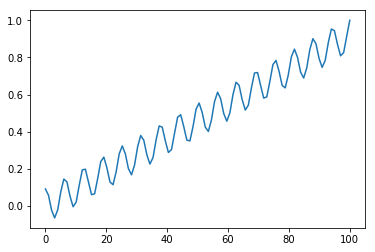

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Länge der Zeitreihe?
N = 100

x = np.linspace(0,100,N)
zr = np.cos(x) + x/10
#zr = x/10

MAX_VALUE = zr.max()
zr /= MAX_VALUE

plt.plot(x,zr, "-")
plt.show()

Wir haben eine systematische Kurve erzeugt: es gibt einen globalen linearen Trend und ein periodisches Verhalten.

# Trainings- und Testdaten vorbereiten

In [49]:
input_window_size = 3

M = N-input_window_size

# z.B. Fenstergröße: 3
#      Länge der Zeitreihe N = 10
#      dann ist M=10-3=7

DX = np.zeros( (M, input_window_size) )
DY = np.zeros( (M, 1) )

print("DX.shape=",DX.shape)
print("DY.shape=",DY.shape)

for i in range(0,M):
    x = zr[i:i+input_window_size]
    y = [ zr[i+input_window_size] ]
    print(x, "-->", y)
        
    DX[i,:] = x
    DY[i,:] = y

#print(DX)
#print(DY)

train_X = DX[0:N//2,:]
test_X  = DX[N//2:,:]

train_Y = DY[0:N//2,:]
test_Y  = DY[N//2:,:]

print("train_X.shape",train_X.shape)
print("test_X.shape", test_X.shape)

print("train_X:\n",train_X)
print("train_Y:\n",train_Y)

DX.shape= (97, 3)
DY.shape= (97, 1)
[ 0.09206137  0.05825508 -0.02139599] --> [-0.06359446853808913]
[ 0.05825508 -0.02139599 -0.06359447] --> [-0.020115428406025818]
[-0.02139599 -0.06359447 -0.02011543] --> [0.077033360242120555]
[-0.06359447 -0.02011543  0.07703336] --> [0.14558511497566515]
[-0.02011543  0.07703336  0.14558511] --> [0.13005273547311291]
[ 0.07703336  0.14558511  0.13005274] --> [0.053689678632763374]
[ 0.14558511  0.13005274  0.05368968] --> [-0.0032857327642234159]
[ 0.13005274  0.05368968 -0.00328573] --> [0.021189270470958005]
[ 0.05368968 -0.00328573  0.02118927] --> [0.11290324608179877]
[-0.00328573  0.02118927  0.11290325] --> [0.19467884034887653]
[ 0.02118927  0.11290325  0.19467884] --> [0.19864549318250929]
[ 0.11290325  0.19467884  0.19864549] --> [0.129796799672978]
[ 0.19467884  0.19864549  0.1297968 ] --> [0.061314259766836958]
[ 0.19864549  0.1297968   0.06131426] --> [0.06603648900062771]
[ 0.1297968   0.06131426  0.06603649] --> [0.148249523216848

# Ein MLP erzeugen und mit den Trainingsdaten trainieren

In [50]:
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense
from keras import optimizers


In [51]:
model = Sequential()
model.add(Dense(20, activation="relu", input_dim=input_window_size))
model.add(Dense(1, activation="linear"))

In [52]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                80        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [53]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [54]:
model.fit(train_X,train_Y, epochs=1000)

Epoch 1/1000
50/50 [==============================] - 0s 4ms/step - loss: 0.0672
Epoch 2/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0502
Epoch 3/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0315
Epoch 4/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0183
Epoch 5/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0122
Epoch 6/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0116
Epoch 7/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0141
Epoch 8/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0157
Epoch 9/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0158
Epoch 10/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0146
Epoch 11/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0129
Epoch 12/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0108
Epoch 13/1000

50/50 [==============================] - 0s 80us/step - loss: 0.0049
Epoch 100/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0049
Epoch 101/1000
50/50 [==============================] - ETA: 0s - loss: 0.004 - 0s 100us/step - loss: 0.0048
Epoch 102/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0048
Epoch 103/1000
50/50 [==============================] - ETA: 0s - loss: 0.005 - 0s 80us/step - loss: 0.0048
Epoch 104/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0048
Epoch 105/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0048
Epoch 106/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0048
Epoch 107/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0047
Epoch 108/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0047
Epoch 109/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0047
Epoch 110/1000
50/50 [================

50/50 [==============================] - 0s 70us/step - loss: 0.0037
Epoch 195/1000
50/50 [==============================] - ETA: 0s - loss: 0.003 - 0s 60us/step - loss: 0.0037
Epoch 196/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0037
Epoch 197/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0037
Epoch 198/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0037
Epoch 199/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0037
Epoch 200/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0037
Epoch 201/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0037
Epoch 202/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0036
Epoch 203/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0036
Epoch 204/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0036
Epoch 205/1000
50/50 [==============================] - 0s 70us/st

50/50 [==============================] - 0s 80us/step - loss: 0.0031
Epoch 292/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0031
Epoch 293/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0031
Epoch 294/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0031
Epoch 295/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0031
Epoch 296/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0031
Epoch 297/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0031
Epoch 298/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0031
Epoch 299/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0031
Epoch 300/1000
50/50 [==============================] - ETA: 0s - loss: 0.003 - 0s 70us/step - loss: 0.0031
Epoch 301/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0031
Epoch 302/1000
50/50 [==============================] - 0s 70us/ste

50/50 [==============================] - 0s 80us/step - loss: 0.0027
Epoch 388/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0027
Epoch 389/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0027
Epoch 390/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0027
Epoch 391/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0027
Epoch 392/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0027
Epoch 393/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0027
Epoch 394/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0027
Epoch 395/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0027
Epoch 396/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0027
Epoch 397/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0027
Epoch 398/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0027
Epoch 3

50/50 [==============================] - 0s 70us/step - loss: 0.0024
Epoch 485/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0025
Epoch 486/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0024
Epoch 487/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0025
Epoch 488/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0024
Epoch 489/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0024
Epoch 490/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0024
Epoch 491/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0024
Epoch 492/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0024
Epoch 493/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0024
Epoch 494/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0024
Epoch 495/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0024
Epoch 

50/50 [==============================] - 0s 60us/step - loss: 0.0022
Epoch 581/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0022
Epoch 582/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0022
Epoch 583/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0022
Epoch 584/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0022
Epoch 585/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0022
Epoch 586/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0022
Epoch 587/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0022
Epoch 588/1000
50/50 [==============================] - 0s 150us/step - loss: 0.0022
Epoch 589/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0022
Epoch 590/1000
50/50 [==============================] - 0s 160us/step - loss: 0.0022
Epoch 591/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0022
Epo

Epoch 677/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0020
Epoch 678/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0020
Epoch 679/1000
50/50 [==============================] - ETA: 0s - loss: 0.002 - 0s 90us/step - loss: 0.0020
Epoch 680/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0020
Epoch 681/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0020
Epoch 682/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0020
Epoch 683/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0020
Epoch 684/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0019
Epoch 685/1000
50/50 [==============================] - 0s 60us/step - loss: 0.0019
Epoch 686/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0019
Epoch 687/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0020
Epoch 688/1000
50/50 [===========================

50/50 [==============================] - 0s 110us/step - loss: 0.0018
Epoch 774/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0018
Epoch 775/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0018
Epoch 776/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0018
Epoch 777/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0018
Epoch 778/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0018
Epoch 779/1000
50/50 [==============================] - 0s 130us/step - loss: 0.0018
Epoch 780/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 781/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0017
Epoch 782/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 783/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0017
Epoch 784/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0017
Epo

50/50 [==============================] - 0s 120us/step - loss: 0.0016
Epoch 870/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0016
Epoch 871/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0016
Epoch 872/1000
50/50 [==============================] - 0s 130us/step - loss: 0.0016
Epoch 873/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0015
Epoch 874/1000
50/50 [==============================] - 0s 80us/step - loss: 0.0015
Epoch 875/1000
50/50 [==============================] - ETA: 0s - loss: 0.001 - 0s 170us/step - loss: 0.0016
Epoch 876/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0015
Epoch 877/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0015
Epoch 878/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0015
Epoch 879/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0015
Epoch 880/1000
50/50 [==============================] - 0s

50/50 [==============================] - 0s 100us/step - loss: 0.0014
Epoch 965/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0014
Epoch 966/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0013
Epoch 967/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0013
Epoch 968/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0013
Epoch 969/1000
50/50 [==============================] - 0s 110us/step - loss: 0.0013
Epoch 970/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0013
Epoch 971/1000
50/50 [==============================] - 0s 120us/step - loss: 0.0013
Epoch 972/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0013
Epoch 973/1000
50/50 [==============================] - 0s 70us/step - loss: 0.0013
Epoch 974/1000
50/50 [==============================] - 0s 100us/step - loss: 0.0013
Epoch 975/1000
50/50 [==============================] - 0s 90us/step - loss: 0.0013

# MLP testen

In [55]:
predvalues = model.predict(test_X)

In [56]:
predvalues.shape

(47, 1)

In [57]:
predvalues[:10]

array([[ 0.39322525],
       [ 0.41057658],
       [ 0.48653215],
       [ 0.55868351],
       [ 0.57216197],
       [ 0.51318514],
       [ 0.45044625],
       [ 0.45027626],
       [ 0.51267552],
       [ 0.59024805]], dtype=float32)

In [58]:
test_Y[:10]

array([[ 0.40154886],
       [ 0.46357312],
       [ 0.56172544],
       [ 0.6127993 ],
       [ 0.57767475],
       [ 0.49795234],
       [ 0.45699625],
       [ 0.50186797],
       [ 0.59925555],
       [ 0.6666686 ]])

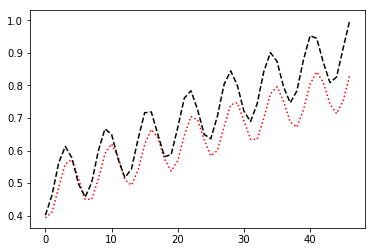

In [59]:
plt.plot(predvalues, label="predicted", linestyle=":", color="red")
plt.plot(test_Y, label="ground truth", linestyle="--", color="black")
plt.show()